<a href="https://colab.research.google.com/github/omyllymaki/mean-shift-clustering/blob/main/mean_shift_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mean shift clustering

In [223]:
import torch
import matplotlib.pyplot as plt
import math

In [224]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
torch.manual_seed(7)

In [226]:

def generate_points(num_clusters, stdev=1):
  # Number of points per cluster
  num_points_per_cluster = 200

  # Initialize an empty list to store points
  points = []

  # Generate points for each cluster
  for _ in range(num_clusters):

      x_center = torch.randn(1)*10
      y_center = torch.randn(1)*10

      # Generate random x and y coordinates from a Gaussian distribution
      x_coordinates = stdev*torch.randn(num_points_per_cluster) + x_center
      y_coordinates = stdev*torch.randn(num_points_per_cluster) + y_center

      # Create a 2D tensor for the cluster and add it to the list
      cluster_points = torch.stack((x_coordinates, y_coordinates), dim=1)
      points.append(cluster_points)

  # Concatenate all cluster points into a single tensor
  points = torch.cat(points)

  return points


In [227]:
points_orig = generate_points(5)
points = points_orig.clone()

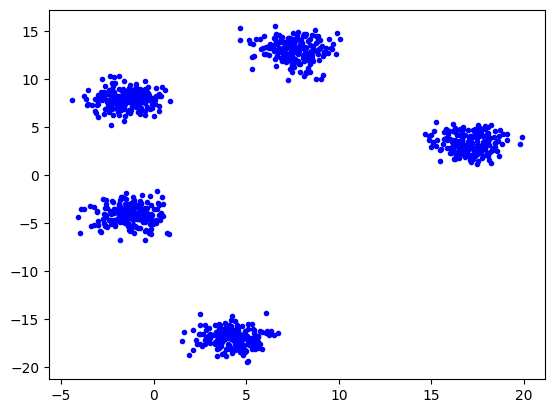

In [228]:
plt.plot(points[:,0], points[:,1], "b.")

## First simple version, CPU, loop each point

In [229]:
for p in points:
  distances = torch.norm(p-points, p=2, dim=1)

In [230]:
distances.shape
print("")
distances[:8]

torch.Size([1000])

tensor([27.2838, 26.4598, 26.8666, 25.5713, 26.6688, 26.3938, 27.0306, 25.6365])

In [231]:
def gaussian(x, mean, std_dev):
    """
    Calculate the Gaussian probability density function value at point x.

    Args:
        x (torch.Tensor): The input value(s) at which to evaluate the Gaussian.
        mean (float): The mean (average) of the Gaussian distribution.
        std_dev (float): The standard deviation of the Gaussian distribution.

    Returns:
        torch.Tensor: The Gaussian function value at point x.
    """
    coefficient = 1 / (std_dev * math.sqrt(2 * math.pi))
    exponent = -((x - mean) ** 2) / (2 * std_dev ** 2)
    return coefficient * torch.exp(exponent)

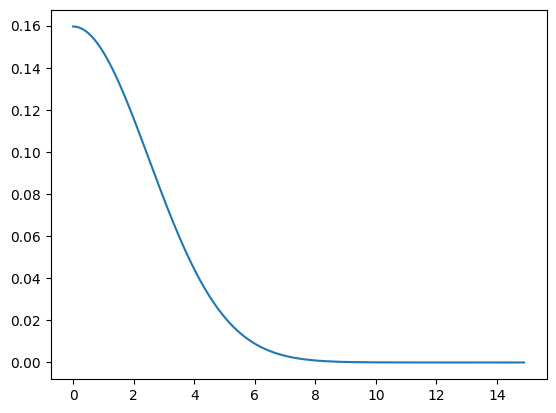

In [232]:
x = torch.arange(0, 15, 0.1)
y = gaussian(x, 0, 2.5)
plt.plot(x,y)

In [233]:
weights = gaussian(distances, 0, 2.5)
weights[:8]

tensor([2.1856e-27, 7.5541e-26, 1.3323e-26, 3.0512e-24, 3.1075e-26, 9.9893e-26,
        6.5698e-27, 2.3361e-24])

In [234]:
weights[:,None].shape, points.shape

(torch.Size([1000, 1]), torch.Size([1000, 2]))

In [235]:
weights.sum()

tensor(25.1765)

In [236]:
(weights[:,None] * points).sum(dim=0) / weights.sum()

tensor([  4.4387, -17.0652])

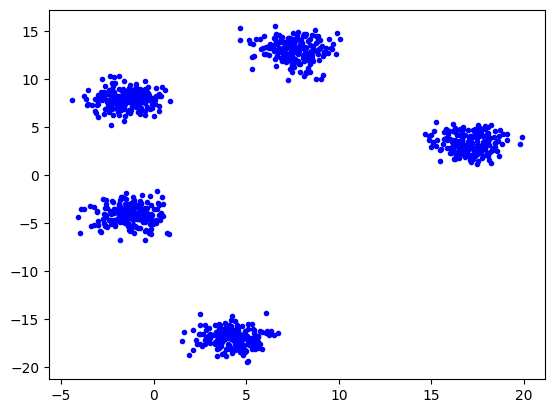

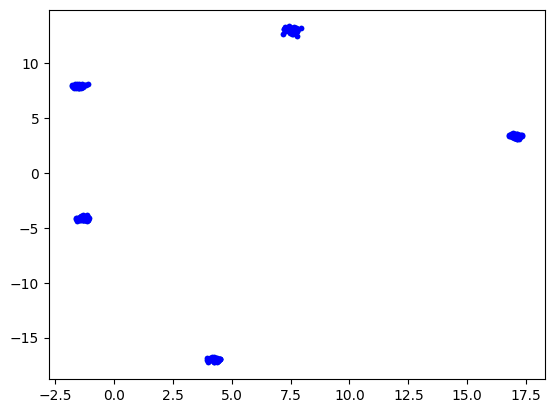

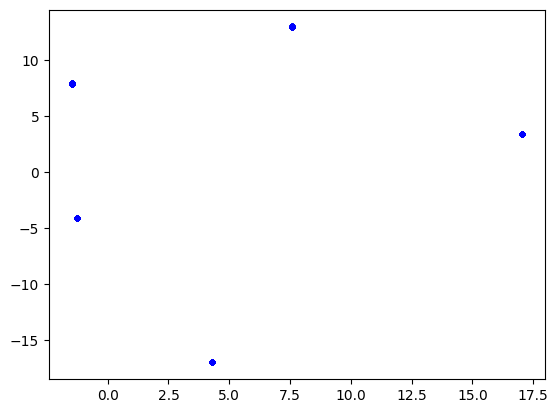

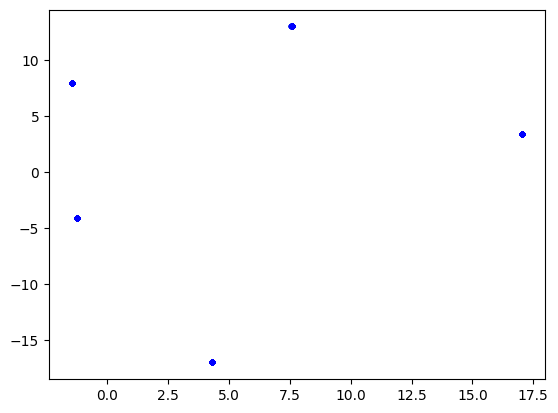

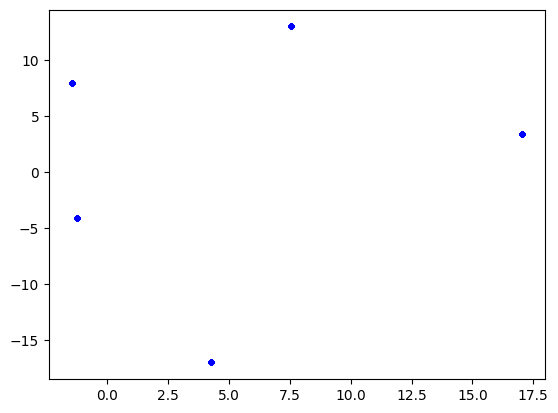

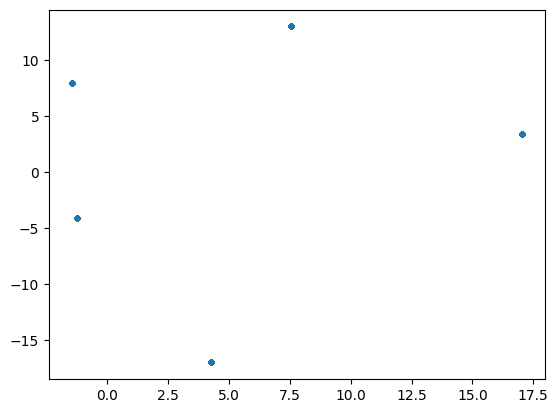

In [237]:
max_iter = 5

points_orig = points.clone()
for k in range(5):
  plt.plot(points[:,0], points[:,1], "b.")
  plt.pause(1.0)
  for i, p in enumerate(points):

    distances = torch.norm(p-points, p=2, dim=1)
    weights = gaussian(distances, 0, 2.5)
    new_point = (weights[:,None] * points).sum(dim=0) / weights.sum()
    points[i] = new_point

  plt.plot(points[:,0], points[:,1], ".")



In [238]:
def clusterize(points_input, max_iter=5):

  points = points_input.clone()

  for k in range(max_iter):
    for i, p in enumerate(points):

      distances = torch.norm(p-points, p=2, dim=1)
      weights = gaussian(distances, 0, 2.5)
      new_point = (weights[:,None] * points).sum(dim=0) / weights.sum()
      points[i] = new_point

  points = points.round(decimals=1)
  u_points = points.round(decimals=1).unique(dim=0)
  output = []
  for up in u_points:
    i = torch.nonzero(torch.all(points == up, dim=1)).squeeze()
    output.append(i.tolist())

  return output



In [239]:
points = points_orig.clone()

Found 5 clusters
200 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


200 [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 

200 [800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 

200 [400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 

200 [600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 

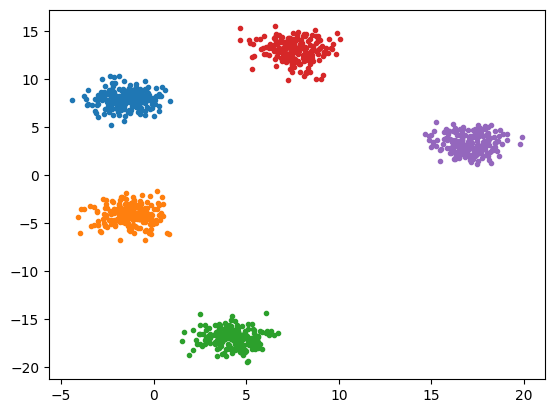

In [240]:
cluster_indices = clusterize(points)
print(f"Found {len(cluster_indices)} clusters")
for ci in cluster_indices:
  print(len(ci), ci)
  c = points[ci]
  plt.plot(c[:,0], c[:,1], ".")

In [241]:
%%timeit -r 3 -n 10
clusterize(points)

695 ms ± 59 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


## Version 2: CPU, calculate distances for batch at once

In [242]:
bs = 5
points_batch = points[:5]

In [243]:
points_batch

tensor([[-1.6349,  8.9728],
        [-1.1828,  8.2401],
        [-2.1090,  8.4056],
        [-2.3616,  6.9726],
        [-1.6444,  8.3326]])

In [244]:
points_batch.shape, points.shape

(torch.Size([5, 2]), torch.Size([1000, 2]))

We want to calculate distances to all points in every point in batch. We would like to get out batch_size x points_size matrix, holding the distances.

In [245]:
points_batch[:,None,:].shape, points[None, :, :].shape

(torch.Size([5, 1, 2]), torch.Size([1, 1000, 2]))

Broadcasting check:

2, 2: same, ok

1, 1000: left one is zero and will be "copied" 1000 times, ok

5, 1: right one is zero and will be "copied" 5 times, ok

In [246]:
diff = points_batch[:,None,:] - points[None, :, :]
diff.shape

torch.Size([5, 1000, 2])

In [247]:
batch_distances = torch.norm(diff, p=2, dim=2)
batch_distances.shape

torch.Size([5, 1000])

In [248]:
# Quick check: second points distances to first 10 ten points

batch_distances[1, :10]
print("")
torch.norm(points[1] - points, p=2, dim=1)[:10]

tensor([0.8609, 0.0000, 0.9409, 1.7309, 0.4708, 1.4895, 1.9010, 0.9723, 0.5018,
        1.0820])

tensor([0.8609, 0.0000, 0.9409, 1.7309, 0.4708, 1.4895, 1.9010, 0.9723, 0.5018,
        1.0820])

In [249]:
weights = gaussian(batch_distances, 0, 2.5)
weights.shape

torch.Size([5, 1000])

In [250]:
wp = weights@points  # dim check [5 x 1000, 1000 x 2 -> 5 x 2]
wp.shape

torch.Size([5, 2])

In [251]:
w_sums = weights.sum(dim=1)[:,None]
w_sums.shape

torch.Size([5, 1])

In [252]:
new_points = wp / w_sums
new_points.shape

torch.Size([5, 2])

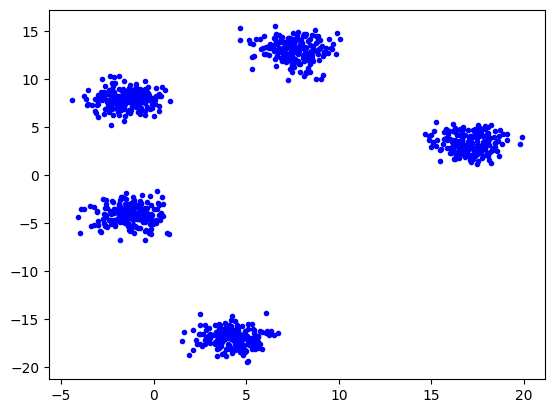

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000


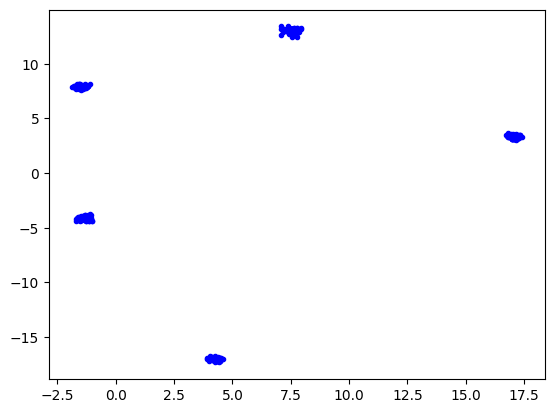

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000


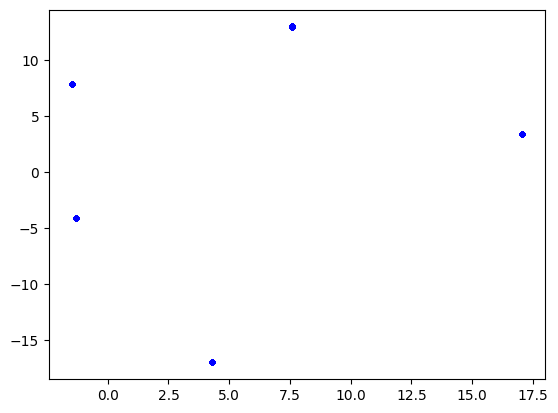

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000


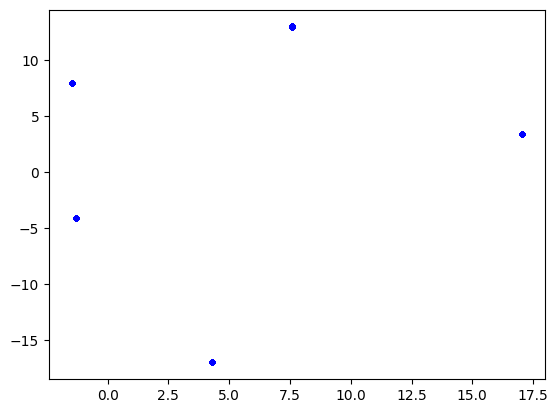

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000


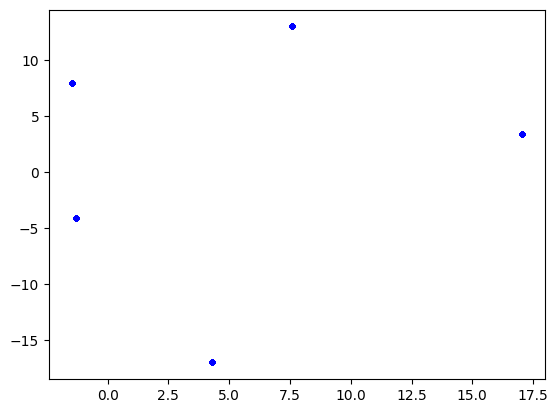

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000
tensor([[ -1.5000,   7.9000],
        [ -1.3000,  -4.1000],
        [  4.3000, -17.0000],
        [  7.6000,  13.0000],
        [ 17.1000,   3.4000]])
200 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 

In [253]:
points = points_orig.clone()

n_points = points.shape[0]
bs = 100

n_max = math.ceil(n_points / bs)

for k in range(5):

  plt.plot(points[:,0], points[:,1], "b.")
  plt.pause(0.01)

  for n in range(n_max):

    i_lb = n * bs
    i_ub = min((n+1)*bs, n_points)
    print(i_lb, i_ub)

    points_batch = points[i_lb:i_ub]

    diff = points_batch[:,None,:] - points[None, :, :]
    batch_distances = torch.norm(diff, p=2, dim=2)
    weights = gaussian(batch_distances, 0, 2.5)
    w_sums = weights.sum(dim=1)[:,None]
    new_points = weights @ points / w_sums

    points[i_lb:i_ub] = new_points

points = points.round(decimals=1)
u_points = points.round(decimals=1).unique(dim=0)
print(u_points)
output = []
for up in u_points:
  i = torch.nonzero(torch.all(points == up, dim=1)).squeeze()
  output.append(i.tolist())

for o in output:
  print(len(o), o)

In [283]:
def clusterize(points_input, bs=50, max_iter=5):
  points = points_input.clone()
  n_points = points.shape[0]
  n_max = math.ceil(n_points / bs)

  for k in range(max_iter):
    for n in range(n_max):

      i_lb = n * bs
      i_ub = min((n+1)*bs, n_points)

      points_batch = points[i_lb:i_ub]
      diff = points_batch[:,None,:] - points[None, :, :]
      batch_distances = torch.norm(diff, p=2, dim=2)
      weights = gaussian(batch_distances, 0, 2.5)
      w_sums = weights.sum(dim=1)[:,None]
      new_points = weights @ points / w_sums

      points[i_lb:i_ub] = new_points

  points = points.round(decimals=1)
  u_points = points.round(decimals=1).unique(dim=0)
  output = []
  for up in u_points:
    i = torch.nonzero(torch.all(points == up, dim=1)).squeeze()
    output.append(i.tolist())

  return output

In [284]:
points = points_orig.clone()

Found 5 clusters
200 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


200 [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 

200 [800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 

200 [400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 

200 [600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 

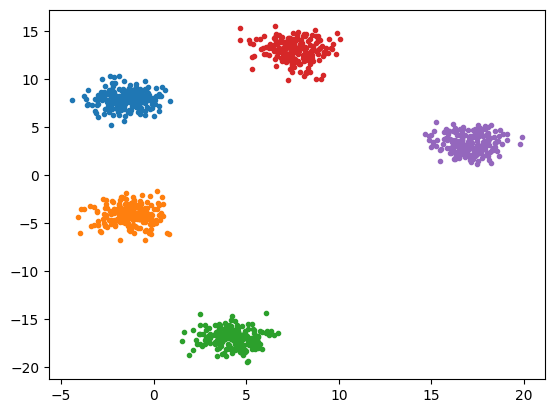

In [285]:
cluster_indices = clusterize(points, bs=500)
print(f"Found {len(cluster_indices)} clusters")
for ci in cluster_indices:
  print(len(ci), ci)
  c = points[ci]
  plt.plot(c[:,0], c[:,1], ".")

In [286]:
%%timeit -r 3 -n 10
clusterize(points, bs=500)

111 ms ± 2.29 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


## 3. version: use GPU

In [295]:
points = points_orig.clone()

In [296]:
device = "cuda"
points = points_orig.clone()
points = points.to(device)

Found 5 clusters
200 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


200 [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 

200 [800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 

200 [400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 

200 [600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 

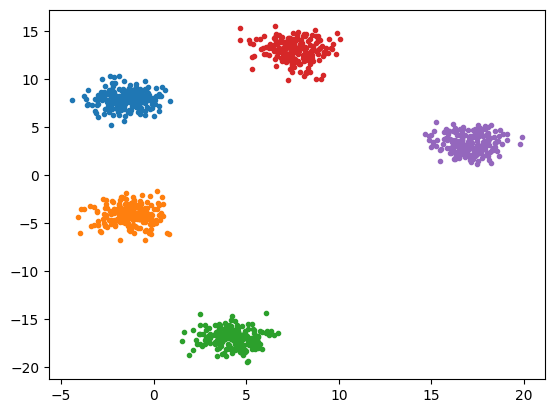

In [298]:
cluster_indices = clusterize(points, bs=500)
print(f"Found {len(cluster_indices)} clusters")
for ci in cluster_indices:
  print(len(ci), ci)
  c = points[ci].cpu()
  plt.plot(c[:,0], c[:,1], ".")

In [299]:
%%timeit -r 3 -n 10
clusterize(points, bs=500)

3.64 ms ± 178 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [291]:
points

tensor([[ -1.6349,   8.9728],
        [ -1.1828,   8.2401],
        [ -2.1090,   8.4056],
        ...,
        [  3.6399, -17.0175],
        [  4.7536, -15.7654],
        [  5.4721, -17.3692]])